## Import Data

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from collections import Counter
import json
 

%matplotlib inline

In [2]:
import os
os.chdir('/Users/li/Desktop')

df = pd.read_csv('USvideos.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Data Preprocessing: Data Formats & Missing Values

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
df[['category_id']]=df[['category_id']].astype(str)

In [5]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

#### There are 570 null values in 'description'. We fill in the missing values with "none".####

In [6]:
# Filling in missing Data in Description column, replacing with "none"
df = df.fillna('none')
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

### Only trending_date and publish_time columns need to be converted to the correct format of datetime type.

In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [8]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

### Since we're interested to know whether the publish_time would impact the popularity of a video, will seperate the publish_time into two columns, each representing date and time.

In [9]:
# separates date and time into two columns from 'publish_time' column
df.insert(5, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


### Rename category_id with the names

In [10]:
#inspect the values of category_id. It seems we should rename these values to make them interpretable
df.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64

In [11]:
category_dict = {'1':'Film/Animation', '2':'Cars/Vehicles', '10':'Music', '15':'Pets/Animals',
                '17':'Sport','19':'Travel/Events','20': 'Gaming','22':'People/Blogs','23':'Comedy',
                '24':'Entertainment','25':'News/Politics','26':'How to/Style','27':'Education',
                '28':'Science/Technology','29':'Non Profits/Activism', '43':'Shows'}

df.insert(5, 'category_name', df['category_id'].map(category_dict))
df.head(5)

,video_id,trending_date,title,channel_title,category_id,category_name,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People/Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Remove duplicated videos that trended in multiple days

In [12]:
print("There are",df.shape[0],"entries in the dataset,")
print("among which" ,df.video_id.duplicated().sum(),"are duplicated videos.")

There are 40949 entries in the dataset,
among which 34598 are duplicated videos.


**A number of videos appear multiple times in our dataset, as they were trending across multiple days. For our purposes, we will remove these duplicated entries for now, and only keep the last entry of each video, as that entry will have to most updated statistics of the corresponding video**

In [13]:
df = df.drop_duplicates(subset=['video_id'], keep='last')

print(df.shape)
df.video_id.duplicated().any()

(6351, 18)


False

In [379]:
df.reset_index(drop=True, inplace = True)


,video_id,trending_date,title,channel_title,category_id,category_name,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sport,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
1,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film/Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
2,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News/Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
3,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
4,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science/Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [435]:
##df.to_csv("clean_data.csv")

### Description of Numerical Columns
-  Views histogram
-  Comment count histogram
-  Likes/Dislikes histogram

In [14]:
df.describe().round()

,views,likes,dislikes,comment_count
count,6351.0,6351.0,6351.0,6351.0
mean,1962117.0,55575.0,3067.0,6451.0
std,7060057.0,193831.0,31988.0,33824.0
min,559.0,0.0,0.0,0.0
25%,159156.0,2772.0,127.0,372.0
50%,518107.0,11906.0,444.0,1266.0
75%,1473582.0,38428.0,1507.0,4062.0
max,225211923.0,5613827.0,1674420.0,1361580.0


We note from the table above that

- The average number of views of a trending video is 1,962,117. The median value for the number of views is 518,107, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
- The average number of likes of a trending video is 55,575, while the average number of dislikes is 3,067. 
- The Average comment count is 6,451 while the median is 1,266.

#### Num. of Views Distribution

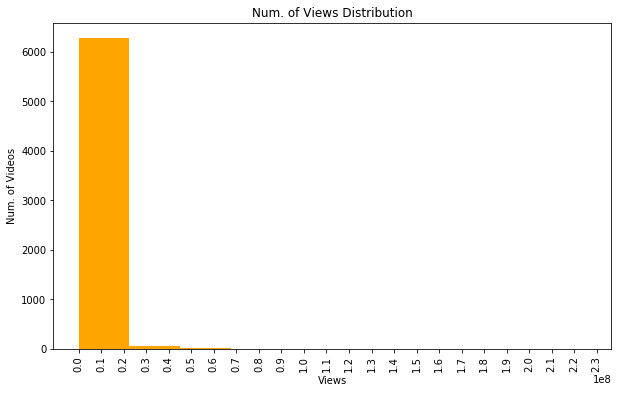

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['views'],color='orange')
#bins = np.linspace(0, 2.3e8, 47)
plt.xticks(np.arange(0, 2.4e8, 1e7))
plt.xticks(rotation = "vertical")
plt.xlabel('Views')
plt.ylabel('Num. of Videos')
plt.title('Num. of Views Distribution')
#plt.ticklabel_format(useOffset = False, style='plain') 
plt.show()

Percentage of videos with less than 2 million views: 85.0 %
Percentage of videos with less than 0.5 million views: 49.0 %


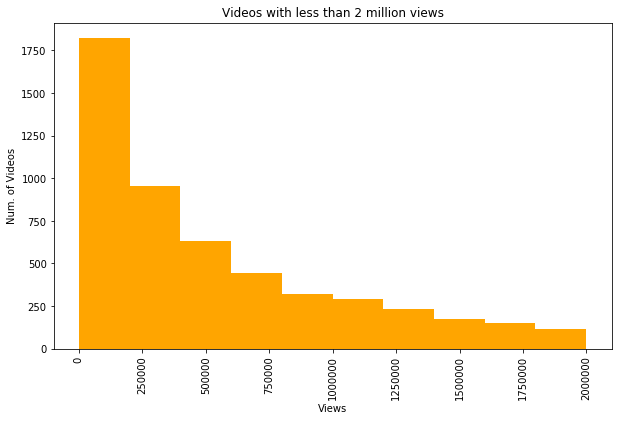

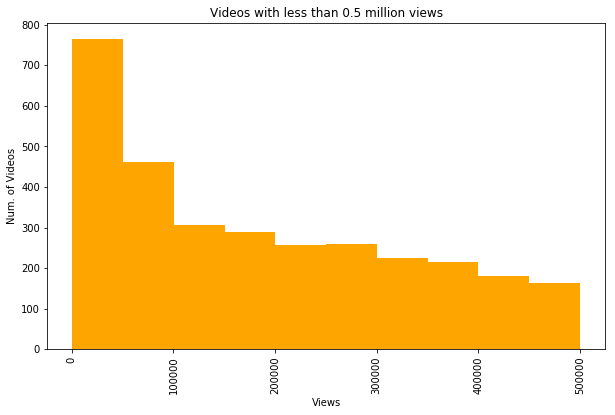

In [382]:
print("Percentage of videos with less than 2 million views:", (df[df['views'] < 2.5e6]['views'].count()
      / df['views'].count() * 100).round(), "%")
print("Percentage of videos with less than 0.5 million views:", (df[df['views'] < 0.5e6]['views'].count()
      / df['views'].count() * 100).round(), "%")
plt.figure(figsize=(10,6))
plt.hist(df[df["views"] < 2e6]["views"],color='orange')
plt.title("Videos with less than 2 million views")
plt.xlabel("Views")
plt.ylabel("Num. of Videos")
plt.xticks(rotation = "vertical")
plt.show()
plt.figure(figsize=(10,6))
plt.hist(df[df["views"] < 0.5e6]["views"],color='orange')
plt.title("Videos with less than 0.5 million views")
plt.xlabel("Views")
plt.ylabel("Num. of Videos")
plt.xticks(rotation = "vertical")
plt.show()

### Num. of Comments Distribution

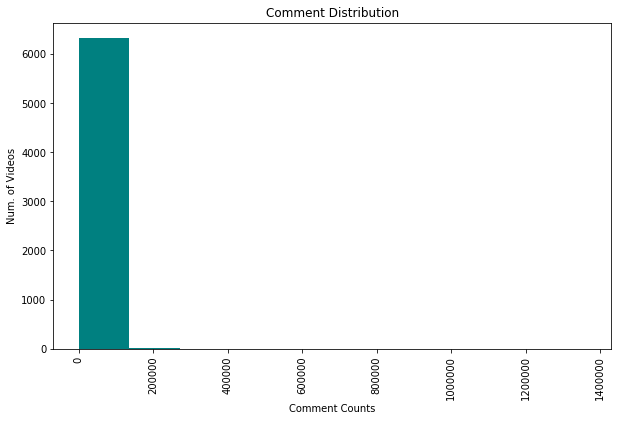

In [383]:
plt.figure(figsize=(10,6))
plt.hist(df['comment_count'],color='teal')
plt.xticks(rotation = "vertical")
plt.xlabel('Comment Counts')
plt.ylabel('Num. of Videos')
plt.title('Comment Distribution')
#plt.ticklabel_format(useOffset = False, style='plain') 
plt.show()

Percentage of videos with less than 10 thousand comments: 88.0 %
Percentage of videos with less than 1.3 thousand comments: 51.0 %


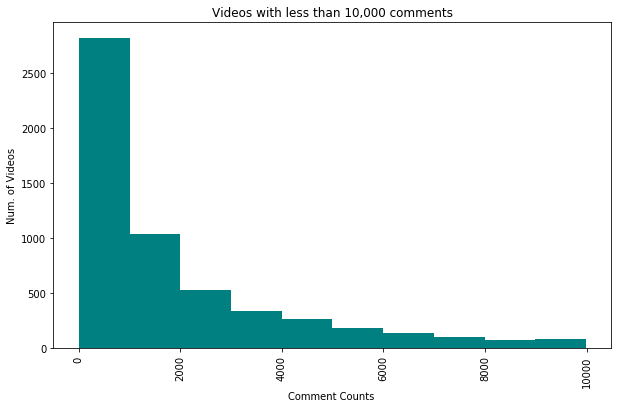

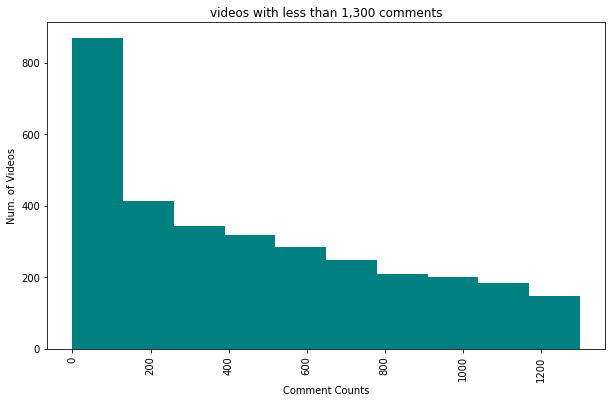

In [384]:
print("Percentage of videos with less than 10 thousand comments:", (df[df['comment_count'] < 1e4]['comment_count'].count()
      / df['views'].count() * 100).round(), "%")
print("Percentage of videos with less than 1.3 thousand comments:", (df[df['comment_count'] < 1.3e3]['comment_count'].count()
      / df['views'].count() * 100).round(), "%")
plt.figure(figsize=(10,6))
plt.hist(df[df['comment_count'] <10000]['comment_count'],color='teal')
plt.xticks(rotation = "vertical")
plt.xlabel('Comment Counts ')
plt.ylabel('Num. of Videos')
plt.title('Videos with less than 10,000 comments') 
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df[df['comment_count'] <1300]['comment_count'],color='teal')
plt.xticks(rotation = "vertical")
plt.xlabel('Comment Counts')
plt.ylabel('Num. of Videos')
plt.title('videos with less than 1,300 comments')
plt.show()

### Correlation

In [385]:
df[['views','likes','dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.834639,0.441923,0.573885
likes,0.834639,1.000000,0.420619,0.765288
dislikes,0.441923,0.420619,1.000000,0.734943
comment_count,0.573885,0.765288,0.734943,1.000000


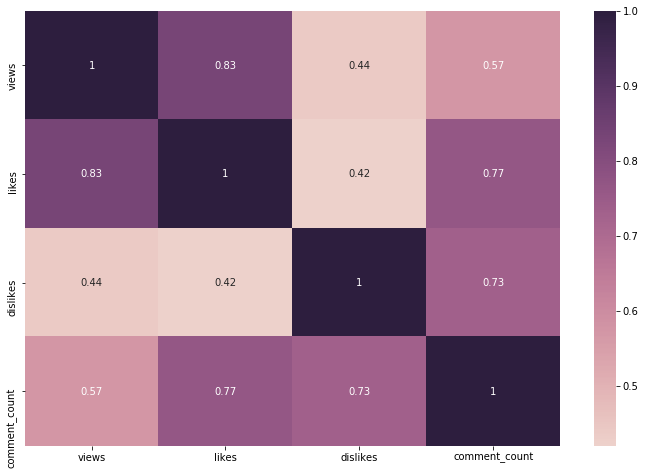

In [21]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(df[['views','likes','dislikes', 'comment_count']].corr(), annot=True, cmap = sns.cubehelix_palette(as_cmap=True))

The correlation map and correlation table above say that Likes and views are highly correlated; 
Comments and views are highly correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

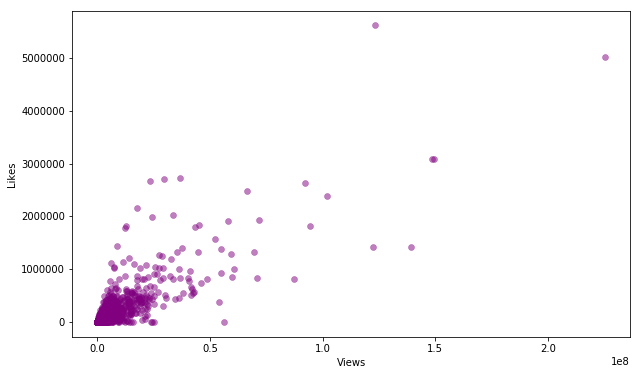

In [387]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['views'], y=df['likes'], color='purple', alpha = 0.5, linewidths = 0.5)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

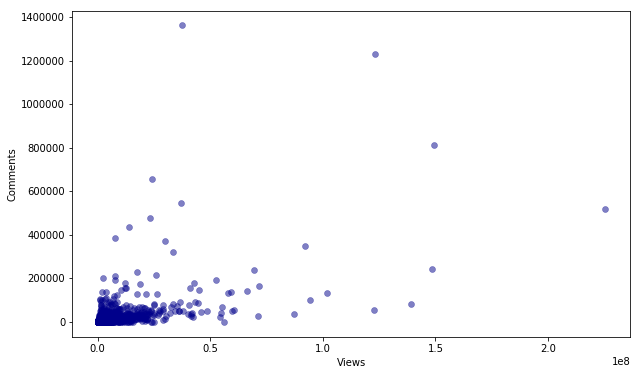

In [388]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['views'], y=df['comment_count'], color='darkblue', alpha = 0.5, linewidths = 0.5)
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()

In [17]:
df.groupby(['category_id'])['likes'].sum()
df.groupby(['category_name'])['likes'].sum()

category_name
Cars/Vehicles              730306
Comedy                   29960684
Education                 5402061
Entertainment            67435618
Film/Animation           16679618
Gaming                    6991366
How to/Style             20646383
Music                   150641673
News/Politics             3011176
Non Profits/Activism      2388624
People/Blogs             23000163
Pets/Animals              2670772
Science/Technology       10165998
Shows                       61741
Sport                    12584136
Travel/Events              586846
Name: likes, dtype: int64

In [390]:
df.groupby(['channel_title'])['likes'].sum()

channel_title
12 News                                                  182
1MILLION Dance Studio                                 178634
1theK (원더케이)                                          878589
20th Century Fox                                     2171536
2CELLOS                                                11702
3Blue1Brown                                            45367
3D Printing Nerd                                        4077
42Fab - Metalworking and Multi-Medium Fabrication        602
494ta                                                    793
4given4ever1                                            7585
5-Minute Crafts                                       432908
52 Skillz                                                491
5FDPVEVO                                              143581
5MadMovieMakers                                       102431
5SOSVEVO                                              698024
60 Minutes                                              1451
730 WVFN  

In [18]:
df.category_name.value_counts()

Entertainment           1621
Music                    801
How to/Style             594
Comedy                   544
News/Politics            504
People/Blogs             495
Sport                    449
Science/Technology       381
Film/Animation           320
Education                251
Pets/Animals             140
Gaming                   103
Cars/Vehicles             71
Travel/Events             59
Non Profits/Activism      14
Shows                      4
Name: category_name, dtype: int64

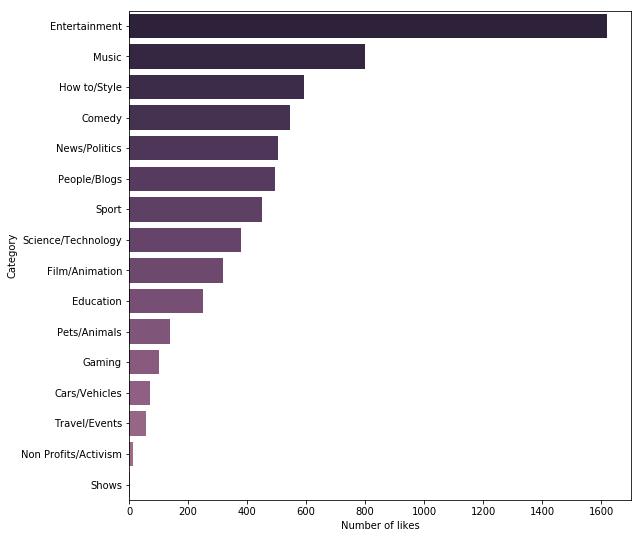

In [22]:
 catlike = df.groupby("category_name").size().reset_index(name="likes").sort_values("likes", ascending=False)
fig, ax = plt.subplots(figsize=(9,9))
_ = sns.barplot(x="likes", y="category_name", data=catlike,palette=sns.cubehelix_palette(n_colors=30, reverse=True), ax=ax)
_ = ax.set(xlabel="Number of likes", ylabel="Category")

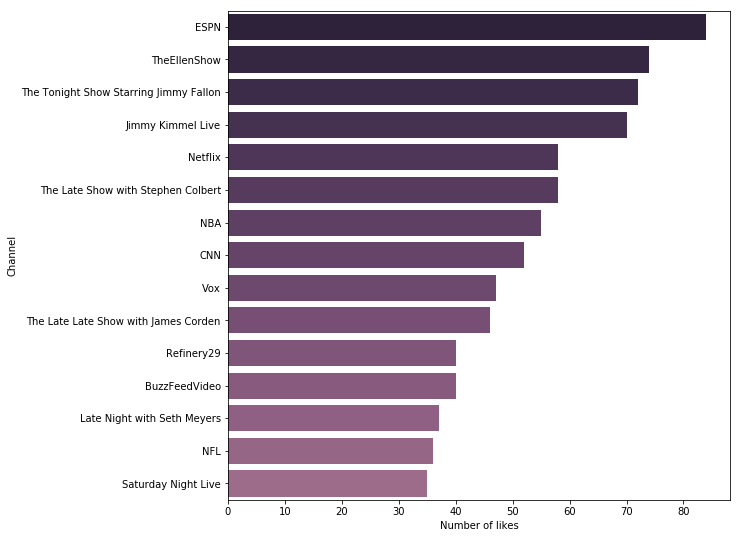

In [23]:
chanlike = df.groupby("channel_title").size().reset_index(name="likes").sort_values("likes", ascending=False).head(15)
fig, ax = plt.subplots(figsize=(9,9))
_ = sns.barplot(x="likes", y="channel_title", data=chanlike,palette=sns.cubehelix_palette(n_colors=30, reverse=True), ax=ax)
_ = ax.set(xlabel="Number of likes", ylabel="Channel")


In [38]:
df.groupby('category_name')['likes', 'dislikes'].count()

,likes,dislikes
category_name,,
Cars/Vehicles,71,71
Comedy,544,544
Education,251,251
Entertainment,1621,1621
Film/Animation,320,320
Gaming,103,103
How to/Style,594,594
Music,801,801
News/Politics,504,504


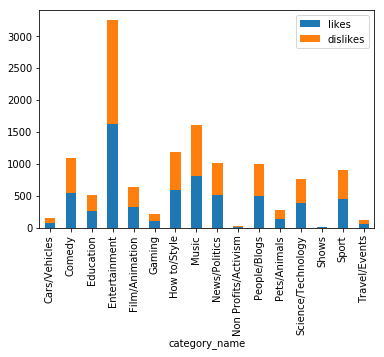

In [30]:
cat_like = df.groupby('category_name')[['likes', 'dislikes']].count()

cat_like.plot.bar(stacked=True)

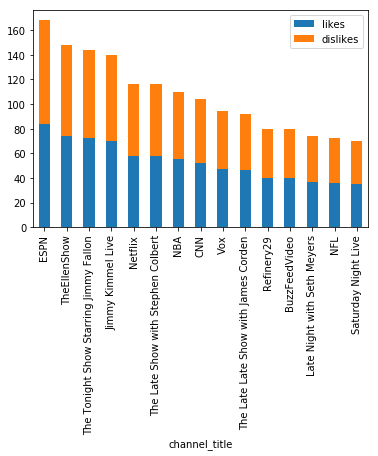

In [395]:
df.groupby('channel_title')[['likes', 'dislikes']].count().sort_values("likes", ascending=False).head(15).plot.bar(stacked=True)



# Comments and ratings 

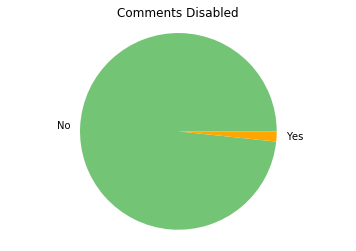

In [396]:
# How many trending videos have their comments disabled
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#74C476', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled')

In [397]:
df["comments_disabled"].value_counts(normalize=True)
# only 1.65% trending videos have their comeents disabled

False    0.983467
True     0.016533
Name: comments_disabled, dtype: float64

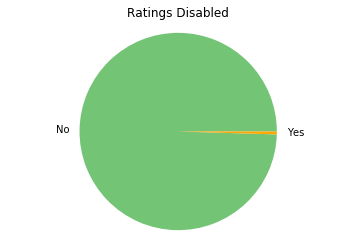

In [398]:
#How many trending videos have their ratings disabled
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#74C476', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled')

In [399]:
df["ratings_disabled"].value_counts()
#only 30 out of 6351 trending videos have their ratings disabled

False    6321
True       30
Name: ratings_disabled, dtype: int64

In [400]:
df["ratings_disabled"].value_counts(normalize=True)

False    0.995276
True     0.004724
Name: ratings_disabled, dtype: float64

In [401]:
# How many trending videos have both comments and ratings disabled
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

16

# Publish Day 

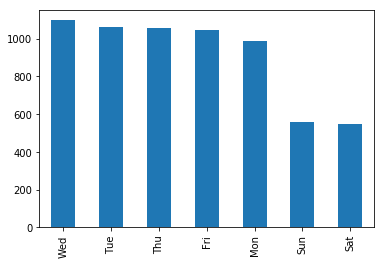

In [402]:
A=df['publish_date'].apply(lambda x: x.strftime('%a')).value_counts()
A.plot.bar()

# Category and Channels

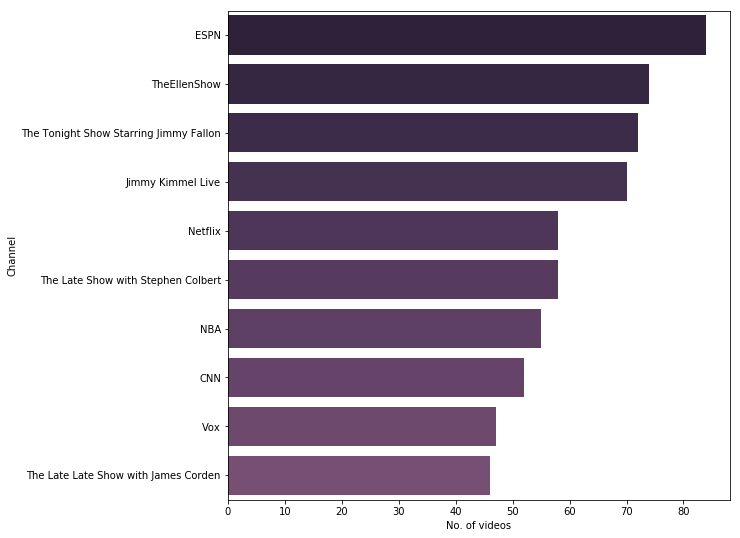

In [403]:
# Channels with top 10 highest number of videos
cdf = df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(9,9))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,palette=sns.cubehelix_palette(n_colors=30, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

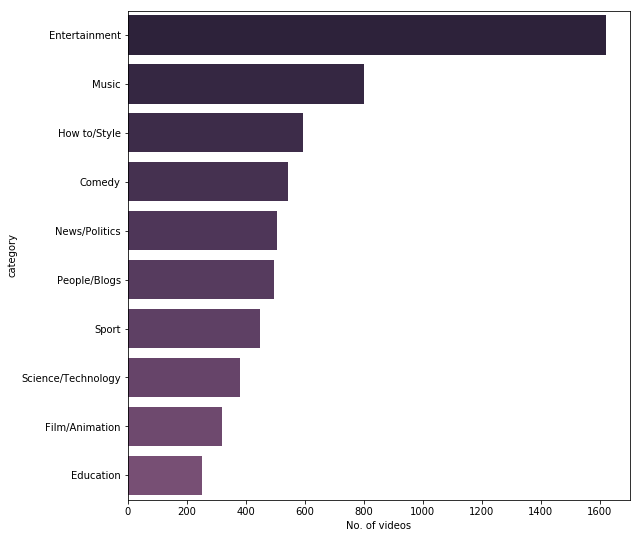

In [404]:
# Categoroies with top 10 highest number of videos
cdf = df.groupby("category_name").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(9,9))
_ = sns.barplot(x="video_count", y="category_name", data=cdf,palette=sns.cubehelix_palette(n_colors=30, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="category")

### What are the top 20 trending vidoes titles based on their number of comments?

In [405]:
a=df['comment_count']
df1=pd.DataFrame(a.sort_values(ascending=False).iloc[0:21]) #return the 10 top vedioes with most comments
df2=pd.merge(df1, df, on= ['comment_count'], how = 'inner')
print(df2[['title','comment_count','category_name']])

                                                title  comment_count  \
0                                           So Sorry.        1361580   
1                 BTS (방탄소년단) 'FAKE LOVE' Official MV        1228655   
2   YouTube Rewind: The Shape of 2017 | #YouTubeRe...         810698   
3                          Suicide: Be Here Tomorrow.         658130   
4   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...         546100   
5   Childish Gambino - This Is America (Official V...         517232   
6                          j-hope 'Daydream (백일몽)' MV         477233   
7                                 LOGAN PAUL IS BACK!         436698   
8        Melting Every Lipstick From Sephora Together         383762   
9   BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...         371864   
10  Marvel Studios' Avengers: Infinity War Officia...         350458   
11                                        we broke up         320194   
12               Ariana Grande - No Tears Left To Cry         24

### Conclusion: 
1.  Among the top 20 trending videos, 5 of them are about BTS, which is an Korean band. 
This indicates that Kpop is trending in America.
2. Nearly half of the top videos are about  music.

### What are the best time to publish a vedio in a day?

In [406]:
#keep only hour of publish_time into a new column called newpublish_time
df['newpublish_time'] = list(map(lambda x : str(df['publish_time'][x])[:2], range(len(df['publish_time'])))) 

                 video_id
newpublish_time          
00                    222
01                    194
02                    172
03                    173
04                    186
05                    221
06                    105
07                    125
08                    151
09                     90
10                     98
11                    149
12                    204
13                    328
14                    429
15                    504
16                    577
17                    529
18                    433
19                    311
20                    327
21                    296
22                    292


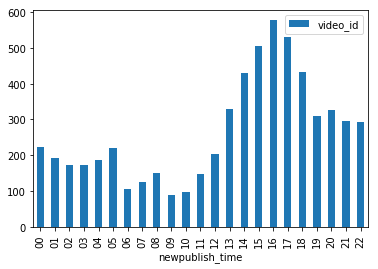

In [407]:
#calculate views by number of videos
grouped1 = df.groupby(['newpublish_time'])['video_id'].count()
grouped1
df_videobytime=pd.DataFrame(grouped1)
df_videobytime=df_videobytime[:-1]#get rid of na
print(df_videobytime)
df_videobytime.plot.bar() 

### Conclusion: 
1pm to 6pm are the most frequent time for uploading vidoes.

                     views
newpublish_time           
00               336748372
01               354634908
02               312749236
03               333068844
04               914811679
05               565225031
06               147765152
07               300581545
08               396471361
09               423559234
10               293555026
11               325007314
12               474308853
13               782851359
14               877282116
15               930205710
16               971517003
17               806478759
18               635416041
19               395351636
20               543602473
21               540333241
22               463861944


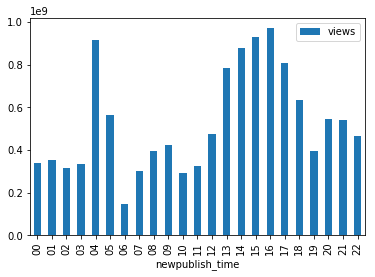

In [408]:
#calculate views by publish time
grouped = df.groupby(['newpublish_time'])['views'].sum()
grouped
df_viewsbytime=pd.DataFrame(grouped)
df_viewsbytime=df_viewsbytime[:-1]#get rid of na
print(df_viewsbytime)
df_viewsbytime.plot.bar() 

### Conclusion
The publish time gets most views are mainly in the afternoon from 1pm to 5pm, reaching its peak at 4pm. 

Follow up question: What happens at 4 am?(Why it is not consistant with publish_time-video graph)

In [409]:
#What are the vedioes published at 4 am??
vedio_4am=df.loc[df['newpublish_time']=='04'].sort_values("views",ascending=False)
vedio_4am[['title','views','newpublish_time']]

,title,views,newpublish_time
6008,Childish Gambino - This Is America (Official V...,225211923,04
5677,Ariana Grande - No Tears Left To Cry,148689896,04
6089,Maroon 5 - Girls Like You ft. Cardi B,66529577,04
2410,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,57951412,04
6226,we broke up,33627806,04
5347,"Calvin Harris, Dua Lipa - One Kiss (Lyric Video)",30061253,04
5349,Poo Bear ft. Justin Bieber & Jay Electronica -...,29178096,04
6145,Backstreet Boys - Don't Go Breaking My Heart (...,18658825,04
6076,Live It Up - Nicky Jam feat. Will Smith & Era ...,17045761,04
3891,Marshmello & Anne-Marie - FRIENDS (Lyric Video...,15208321,04


### Conclusion
We saw a spike at 4pm. The reason is that there are two really popular video published at that time:
Childish Gambino-This is America and Ariana Grande-No Tears Left to cry. 
These two are in the top 20 list in the last slide.

In [421]:
pip install wordcloud

    100% |████████████████████████████████| 163kB 3.9MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [422]:
import wordcloud

### How many trending video titles contain capitalized word?

In [423]:
# Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). 
# To do that, we will add a new variable (column) to the dataset whose value is "True" if the video title 
# has at least a capitalized word in it, and "False" otherwise.
# filter out empty cells in the dataframe 
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

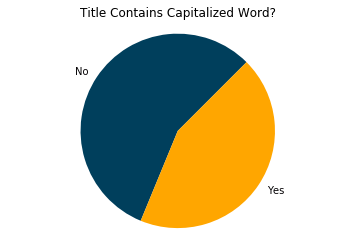

In [424]:
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [425]:
df["contains_capitalized"].value_counts(normalize=True)

False    0.562746
True     0.437254
Name: contains_capitalized, dtype: float64

#### Conclusion
As shown above, around 44% of trending video titles contain at least one capitalized word. 
We will later use this added new column "contains_capitalized" in analyzing correlation between variables

### Video Title Lengths

Let's add another column to our dataset to represent the length of each video title, 
then plot the histogram of title length to get an idea about the lengths of trnding video titles.

In [426]:
df["title_length"] = df["title"].apply(lambda x: len(x))

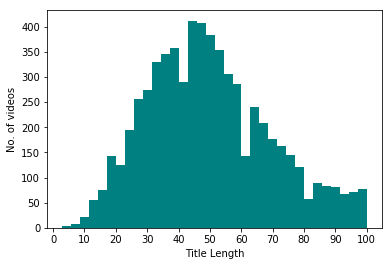

In [427]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, color="teal", hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))


We can see that title-length distribution resembles a normal distribution, 
where most videos have title lengths between 30 and 60 character approximately.
Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

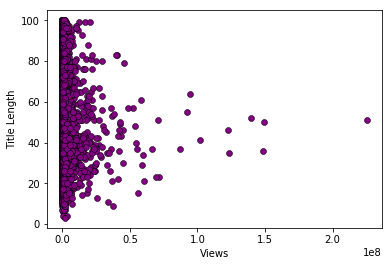

In [428]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color="purple", edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

#### Conclusion

By looking at the scatter plot, we can say that there is no obvious relationship 
between the title length and the number of views. 
However, we notice an interesting thing: videos that have 100,000,000 views and more have title length 
between 30 and 50 characters approximately.

### Correlation Between Variables

In [430]:
df.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
views,1.000000,0.834639,0.441923,0.573885,0.002931,0.016427,-0.002606,-0.014160,-0.041966
likes,0.834639,1.000000,0.420619,0.765288,-0.023881,-0.019754,-0.003113,0.006644,-0.081465
dislikes,0.441923,0.420619,1.000000,0.734943,-0.003251,-0.006606,-0.000713,-0.012464,-0.034779
comment_count,0.573885,0.765288,0.734943,1.000000,-0.024730,-0.012428,-0.002684,0.023277,-0.068389
comments_disabled,0.002931,-0.023881,-0.003251,-0.024730,1.000000,0.279214,-0.003255,0.012667,0.029900
ratings_disabled,0.016427,-0.019754,-0.006606,-0.012428,0.279214,1.000000,-0.001729,0.004085,-0.004623
video_error_or_removed,-0.002606,-0.003113,-0.000713,-0.002684,-0.003255,-0.001729,1.000000,-0.022129,-0.014414
contains_capitalized,-0.014160,0.006644,-0.012464,0.023277,0.012667,0.004085,-0.022129,1.000000,0.134350
title_length,-0.041966,-0.081465,-0.034779,-0.068389,0.029900,-0.004623,-0.014414,0.134350,1.000000


#### Conclusion

As shown above, there is no significant correlation between title and likes or between title and views.
However, views and likes are highly positively correlated with a correlation value of 0.83; 
we see also a high positive correlation (0.77) between likes and comment count, and between dislikes and comment count (0.73).
There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

### Most Common Words in Video Titles

Let's see if there are some words that are used significantly in trending video titles. 
We will display the 25 most common words in all trending video titles

In [431]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 1788),
 ('-', 1554),
 ('The', 927),
 ('the', 616),
 ('to', 405),
 ('a', 404),
 ('of', 402),
 ('in', 367),
 ('and', 317),
 ('&', 305),
 ('A', 305),
 ('with', 288),
 ('on', 286),
 ('2018', 275),
 ('I', 271),
 ('Trailer', 261),
 ('How', 249),
 ('Official', 216),
 ('To', 203),
 ('Video)', 197),
 ('for', 178),
 ('(Official', 168),
 ('You', 165),
 ('With', 147),
 ('My', 140)]

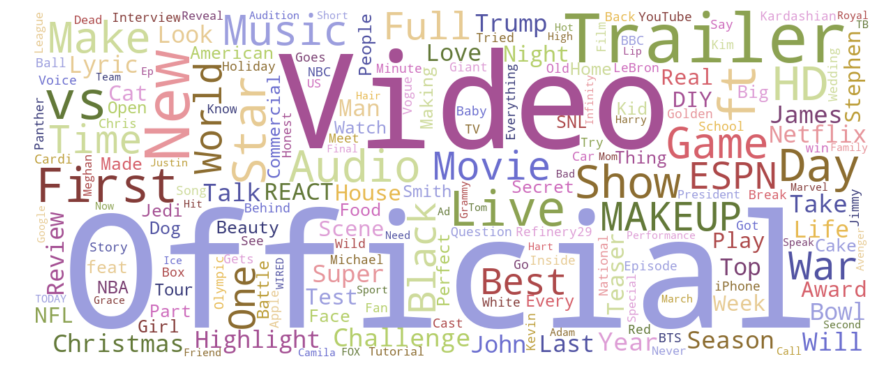

In [432]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#### Conclusion

As shown above, some of the most common words in the titles are "Official", "Trailer", "Video", "New", and "Live" etc.

### Most Common Words in Tags

 Let's see if there are some words that are used significantly in trending video tags. 
We will display the 25 most common words in all trending video tags

In [433]:
tags_words = list(df["tags"].apply(lambda x: x.split()))
tags_words = [x for y in tags_words for x in y]
Counter(tags_words).most_common(25)

[('the', 1184),
 ('to', 992),
 ('of', 966),
 ('and', 878),
 ('a', 628),
 ('in', 445),
 ('vs', 350),
 ('with', 342),
 ('Late', 332),
 ('The', 328),
 ('on', 322),
 ('for', 272),
 ('[none]', 258),
 ('is', 219),
 ('&', 217),
 ('my', 215),
 ('new', 183),
 ('make', 177),
 ('you', 173),
 ('it', 160),
 ('take', 150),
 ('life', 145),
 ('makeup', 140),
 ('your', 131),
 ('music', 126)]

Let's draw a word cloud for the tags of our trending videos, which is a way to visualize most common words in tags
the more common the word is, the bigger its font size is:

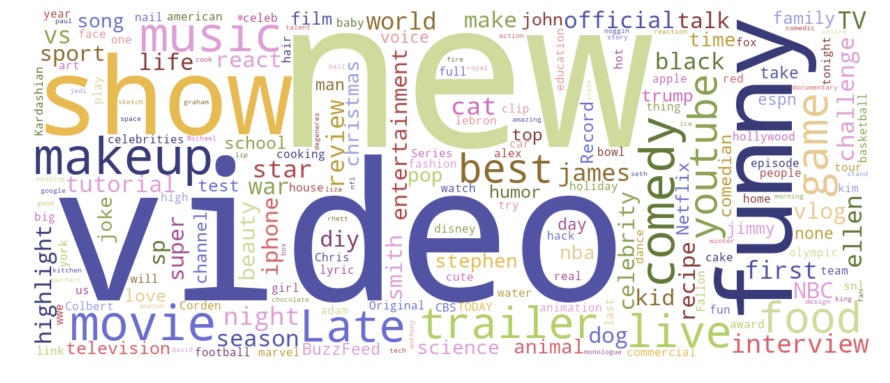

In [434]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(tags_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#### Conclusion

 As shown above, some of the most common words in tags are "Video", "New", "Show", "Funny", and "Music" etc.